# This notebook is to perform "leave organisms out" test aka test 2

# Table of contents
## Adherence assay
## Toxicity assay
## Reporter assay
## AMR
## Ensemble    

In [1]:
import sys
sys.path.append("..")
import numpy as np
from src.preprocessing.preproc import adherence_data
from src.preprocessing.preproc import toxicity_data 
from src.preprocessing.preproc import amr_data 
from src.models.ML_functions import *
from src.ensemble.ensemble_functions import *
from harness.th_model_instances.hamed_models.random_forest_classification import random_forest_classification
from harness.th_model_instances.hamed_models.navie_bayes import gaussian_naive_bayes_classification
from harness.th_model_instances.hamed_models.rocklin_models import logistic_classifier
from harness.th_model_instances.perovskite_models.xgboost import gradient_boosted_tree
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
th_path ='../data/ML_output/Test2'
th = TestHarness(output_location=th_path)

# Adherence

In [5]:
adh_a549, feature_cols = adherence_data.process_a549_files(['../data/Adherence/old_ivv_A549', '../data/Adherence/new_ivv_A549'])

In [78]:
run_ml(adh_a549, 'adherence1',feature_cols_to_use=feature_cols, 
       models_to_test = [logistic_classifier, gaussian_naive_bayes_classification, random_forest_classification, gradient_boosted_tree],
       output_dir = th_path, repeat = 10, 
       feature_cols_to_normalize=feature_cols, sparse_cols_to_use=None, percents = [0.2,0.3,0.4,0.5,0.6,0.7,0.8])


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 17:04:48
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 17:04:49. Total run time = 1.01 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gaussian_naive_bayes_classification at time 17:04:49
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 17:04:50. Total run time = 1.01 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------

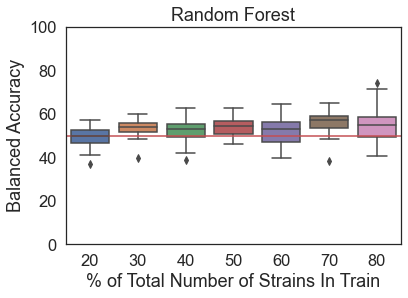

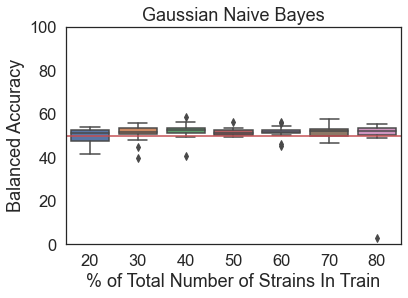

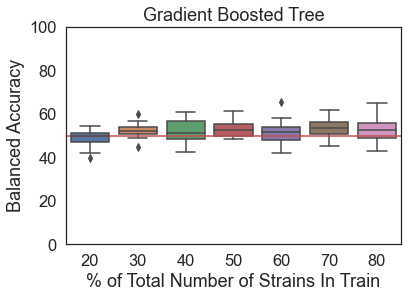

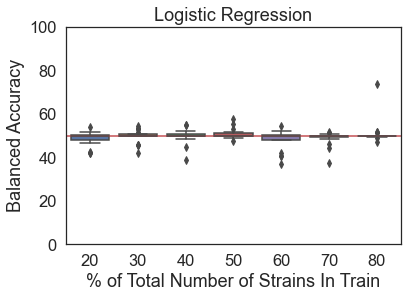

In [3]:
plot_leaderboard('adherence1', th_path)

In [4]:
get_max_accuracy('adherence1', th_path)

Description      Model Name                  
adherence1__0.7  random_forest_classification    56.14
Name: Balanced Accuracy, dtype: float64
Description      Model Name                  
adherence1__0.7  random_forest_classification    5.730105
Name: Balanced Accuracy, dtype: float64


# Toxicity

In [9]:
old_ivv = pd.read_csv('../data/Toxicity/old_toxicity_ivv.csv')
new_ivv = toxicity_data.load('../data/Toxicity/processed_PI_12_22_2020.csv', '../data/Toxicity/processed_hoechst_12_22_2020.csv',
                         add_time = True)
joined_ivv = pd.concat([old_ivv, new_ivv]).reset_index(drop = True)
joined_ivv['index_col'] = range(len(joined_ivv))
feature_cols = ['Time', 'DAPI', 'Hoechst']

In [80]:
run_ml(joined_ivv, 'tox1',feature_cols_to_use=feature_cols, 
       models_to_test = [logistic_classifier, gaussian_naive_bayes_classification, random_forest_classification, gradient_boosted_tree],
       output_dir = th_path, repeat = 10, 
       feature_cols_to_normalize=feature_cols, sparse_cols_to_use=None, percents = [0.2,0.3,0.4,0.5,0.6,0.7,0.8])


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 17:12:59
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 17:13:00. Total run time = 1.36 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gaussian_naive_bayes_classification at time 17:13:00
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 17:13:02. Total run time = 1.26 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------

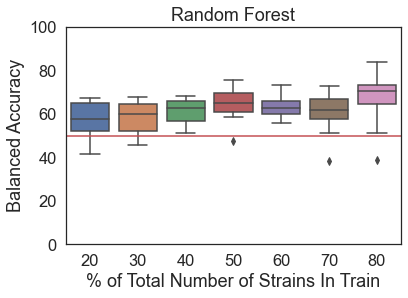

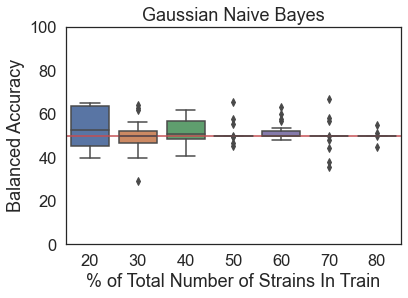

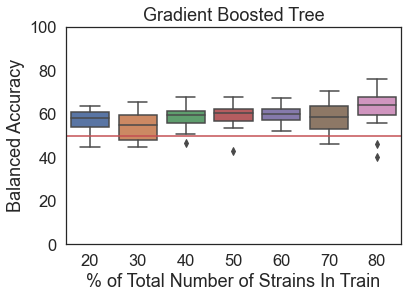

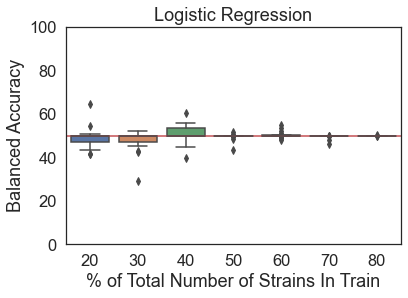

In [5]:
plot_leaderboard('tox1', th_path)

In [6]:
get_max_accuracy('tox1', th_path)

Description  Model Name                  
tox1__0.8    random_forest_classification    68.245
Name: Balanced Accuracy, dtype: float64
Description  Model Name                  
tox1__0.8    random_forest_classification    10.462488
Name: Balanced Accuracy, dtype: float64


# Reporter

In [12]:
controls = pd.read_csv('../data/Immune activation/controls.csv')
all_reporter_df = pd.read_csv('../data/Immune activation/other_strains.csv')
scaled_features = [col for col in all_reporter_df.columns if 'scaled' in col]
total_reporter = pd.concat([controls, all_reporter_df]).reset_index(drop = True)

In [82]:
run_ml(total_reporter, 'reporter1', feature_cols_to_use=scaled_features, 
       models_to_test = [logistic_classifier, gaussian_naive_bayes_classification, random_forest_classification, gradient_boosted_tree],
       output_dir = th_path, repeat = 10, 
       feature_cols_to_normalize=scaled_features, sparse_cols_to_use=None, percents = [0.2,0.3,0.4,0.5,0.6,0.7,0.8])


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 17:22:33
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.02 seconds
Testing time was: 0.01 seconds
Run finished at 17:22:35. Total run time = 1.60 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gaussian_naive_bayes_classification at time 17:22:35
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.01 seconds
Testing time was: 0.02 seconds
Run finished at 17:22:36. Total run time = 1.52 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------

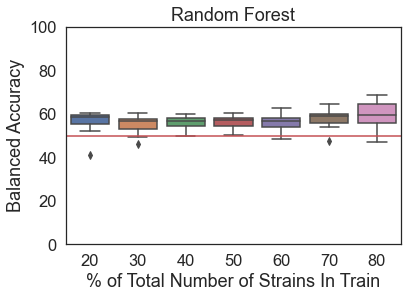

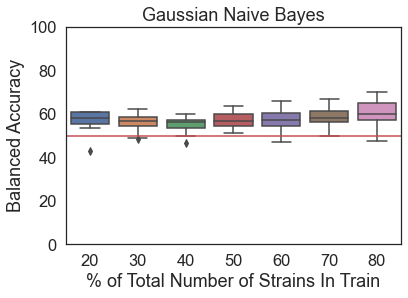

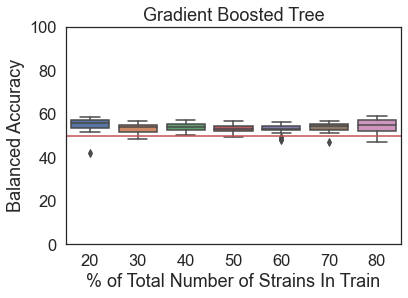

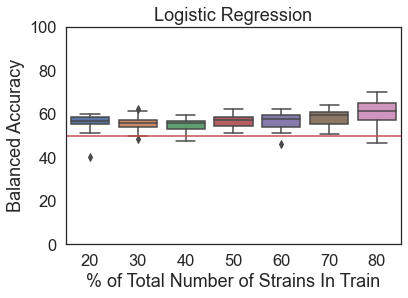

In [7]:
plot_leaderboard('reporter1', th_path)

In [8]:
get_max_accuracy('reporter1', th_path)

Description     Model Name         
reporter1__0.8  logistic_classifier    60.775
Name: Balanced Accuracy, dtype: float64
Description     Model Name         
reporter1__0.8  logistic_classifier    6.496062
Name: Balanced Accuracy, dtype: float64


# AMR (or AR)

In [16]:
old_amr_df = amr_data.load('../data/AMR/Antibiotic Resistance Data-06-24-20.xlsx', ['Ampicillin', 'Ceftazidime', 'Kanamycin', 'Tetracycline', 'Chloramphenicol', 'Polymyxin B'])
new_amr_df = amr_data.load('../data/AMR/processed_AMR_Oct_2020.xlsx', ['Ampicillin', 'Ceftazidime', 'Kanamycin', 'Tetracycline', 'Chloramphenicol', 'Polymyxin B'])

In [17]:
joined_amr_df = pd.concat([old_amr_df, new_amr_df]).reset_index(drop = True)
joined_amr_df['index_col'] = range(len(joined_amr_df))

In [84]:
run_ml(joined_amr_df, 'amr1', feature_cols_to_use=['antibiotic', 'DD', 'DD^2', 'DD^2_std'], 
       models_to_test = [logistic_classifier, gaussian_naive_bayes_classification, random_forest_classification, gradient_boosted_tree],
       output_dir = th_path, repeat = 10, feature_cols_to_normalize=['DD', 'DD^2', 'DD^2_std'], 
       sparse_cols_to_use=['antibiotic'], percents = [0.2,0.3,0.4,0.5,0.6,0.7,0.8])


----------------------------------------------------------------------------------------------------
Starting run of model logistic_classifier at time 17:47:18
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 17:47:20. Total run time = 1.42 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


----------------------------------------------------------------------------------------------------
Starting run of model gaussian_naive_bayes_classification at time 17:47:20
Normalizing training and testing splits...
Starting Classification training...
Training time was: 0.00 seconds
Testing time was: 0.01 seconds
Run finished at 17:47:21. Total run time = 1.31 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


-------------------------------------------------------------

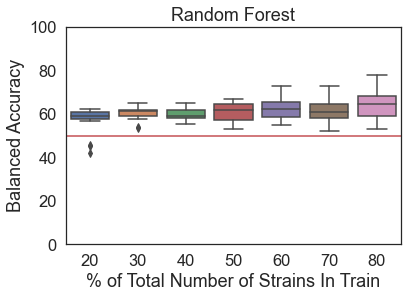

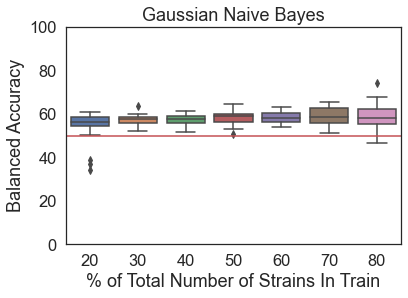

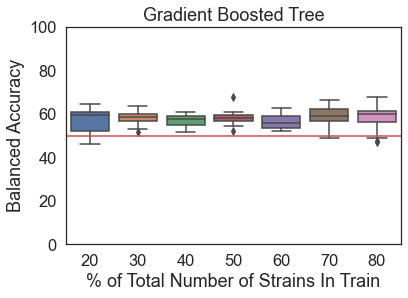

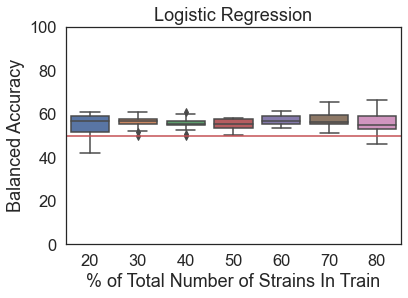

In [9]:
plot_leaderboard('amr1', th_path)

In [11]:
get_max_accuracy('amr1', th_path)

Description  Model Name                  
amr1__0.8    random_forest_classification    63.745
Name: Balanced Accuracy, dtype: float64
Description  Model Name                  
amr1__0.8    random_forest_classification    6.210049
Name: Balanced Accuracy, dtype: float64


# Stage 2 ensemble

In [88]:
adh_acc = stage2_balanced_accuracy('adherence1', 'random', th_path)
tox_acc = stage2_balanced_accuracy('tox1', 'random', th_path)
reporter_acc = stage2_balanced_accuracy('reporter1', 'logistic', th_path)
amr_acc = stage2_balanced_accuracy('amr1', 'random', th_path)

tox1 0.2 20
tox1 0.3 20
tox1 0.4 20
tox1 0.5 20
tox1 0.6 20
tox1 0.7 20
tox1 0.8 20


Figure has been saved.


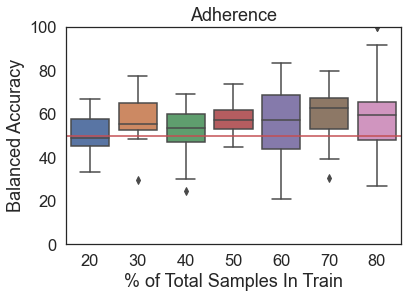

Figure has been saved.


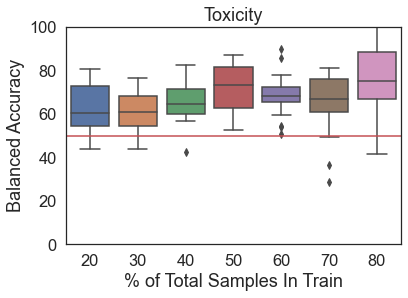

Figure has been saved.


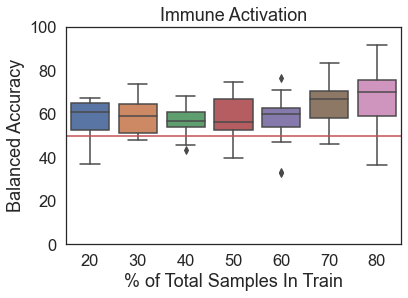

Figure has been saved.


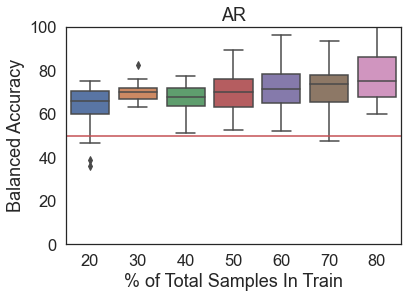

In [200]:
assay_names = ['Adherence', 'Toxicity', 'Immune Activation', 'AR']
for i, acc in enumerate([adh_acc, tox_acc, reporter_acc, amr_acc]):
    plot_stage2_aggregated_accuracy(acc, assay_names[i])

In [202]:
print(max(adh_acc.groupby(['% of Total Samples In Train'])['Balanced Accuracy'].mean()))
print(max(tox_acc.groupby(['% of Total Samples In Train'])['Balanced Accuracy'].mean()))
print(max(reporter_acc.groupby(['% of Total Samples In Train'])['Balanced Accuracy'].mean()))
print(max(amr_acc.groupby(['% of Total Samples In Train'])['Balanced Accuracy'].mean()))

60.16875534838922
76.29469141969142
66.4492451992452
76.8038974913975


# Stage 3 ensemble

In [204]:
best_adh_data = get_test_data('adherence1', 0.7, 'random', th_path)
best_tox_data = get_test_data('tox1', 0.8, 'random', th_path)
best_reporter_data = get_test_data('reporter1', 0.8, 'logistic', th_path)
best_amr_data = get_test_data('amr1', 0.8, 'random', th_path)

In [207]:
stage3_df = get_different_stage3_combo1(best_adh_data, best_tox_data, best_reporter_data, best_amr_data, 0.02)
np.round(stage3_df.groupby(['Assays']).mean())

,Accuracy,Precision,Recall,F1
Assays,,,,
adh_ar,80.0,84.0,89.0,86.0
adh_tox,76.0,79.0,90.0,84.0
adh_tox_ar,85.0,88.0,91.0,89.0
all 4,85.0,91.0,87.0,89.0
tox_ar,83.0,90.0,86.0,88.0
